# Trabalhando com arquivos Excel

In [60]:
#Importando a biblioteca
import pandas as pd

In [61]:
#Lendo os Arquivos
df1 = pd.read_excel("C:\Users\vulco\Desktop\HASHTAG\python\Pandas01\datasets\Aracaju.xlsx")
df2 = pd.read_excel("C:\Users\vulco\Desktop\HASHTAG\python\Pandas01\datasets\Fortaleza.xlsx")
df3 = pd.read_excel("C:\Users\vulco\Desktop\HASHTAG\python\Pandas01\datasets\Natal.xlsx")
df4 = pd.read_excel("C:\Users\vulco\Desktop\HASHTAG\python\Pandas01\datasets\Recife.xlsx")
df5 = pd.read_excel("C:\Users\vulco\Desktop\HASHTAG\python\Pandas01\datasets\Salvador.xlsx")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3950999693.py, line 2)

In [62]:
#Juntando todos os arquivos
df =  pd.concat([df1,df2,df3,df4,df5])

In [63]:
#Exibindo as 5 primeiras linhas 
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [64]:
#Exibindo as ultimas 5 linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [65]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
77,Aracaju,2018-01-01,24.10,1522,1
126,Fortaleza,2019-03-02,41.87,980,8
116,Fortaleza,2019-03-02,79.10,982,2
195,Natal,2019-01-02,44.89,1036,3
126,Natal,2019-01-02,41.69,1036,2
83,Salvador,2019-01-01,63.66,1036,2
8,Natal,2019-03-27,667.00,852,4
86,Fortaleza,2019-01-01,42.11,1004,3
41,Natal,2018-05-20,835.00,852,4
132,Recife,2019-03-02,17.49,983,5


In [66]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [67]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [68]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

# Tratando valores faltantes


In [69]:
#Consultando Linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [70]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [71]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [72]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [73]:
#Apagando as linhas com valores nulos
df.dropna(how="all", inplace=True)

In [74]:
#Apagando as linhas com valores nulos com base em apenas 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [75]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)


# Criando novas colunas


In [76]:
# Criando nova coluna de receita 'vendas' X 'qtde'
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [77]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [78]:
#Caso não houvesse a coluna de Qtde
df["Receitas/Vendas"] = df["Receita"] / df["Vendas"]

In [79]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [80]:
#Retornando a maior receita
df["Receita"].max()


3544.0

In [81]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [82]:
#Retorna o top X da coluna desejada
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [83]:
#Retorna o top X menores valores da Coluna
df.nsmallest(3, "Receita")


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [84]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [85]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com Datas


In [86]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].view("int64")

In [87]:
df.dtypes

Cidade              object
Data                 int64
Vendas             float64
LojaID              object
Qtde                 int64
Receita            float64
Receitas/Vendas    float64
dtype: object

In [88]:
#Transformando coluna de INT para DATA
df["Data"] = pd.to_datetime(df["Data"])

In [89]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receita                   float64
Receitas/Vendas           float64
dtype: object

In [90]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [91]:
#Criando nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [92]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda
89,Fortaleza,2019-01-01,7.19,1004,5,35.95,5.0,2019
78,Fortaleza,2019-01-01,37.66,1005,2,75.32,2.0,2019
56,Fortaleza,2019-01-01,18.43,1002,1,18.43,1.0,2019
16,Salvador,2019-01-01,32.47,1036,2,64.94,2.0,2019
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019
156,Salvador,2019-01-02,36.14,1037,3,108.42,3.0,2019
144,Natal,2019-01-02,23.38,1034,1,23.38,1.0,2019
136,Salvador,2019-03-02,13.81,1036,1,13.81,1.0,2019
42,Recife,2019-01-01,161.45,983,3,484.35,3.0,2019
91,Aracaju,2018-01-01,200.85,1522,6,1205.10,6.0,2018


In [93]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [94]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda
76,Aracaju,2018-01-01,33.51,1523,4,134.04,4.0,2018,1,1
184,Natal,2019-01-02,167.16,1037,1,167.16,1.0,2019,1,2
108,Salvador,2019-03-02,11.72,1037,1,11.72,1.0,2019,3,2
1,Recife,2019-01-01,11.44,983,1,11.44,1.0,2019,1,1
213,Natal,2019-01-02,42.12,1035,1,42.12,1.0,2019,1,2


In [95]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [96]:
#calculando a diferença de datas
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [97]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
105,Recife,2019-01-01,41.12,980,3,123.36,3.0,2019,1,1,365 days
37,Fortaleza,2019-01-01,35.86,1002,6,215.16,6.0,2019,1,1,365 days
90,Fortaleza,2019-01-01,18.01,1005,2,36.02,2.0,2019,1,1,365 days
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days


In [98]:
#Criando uma coluna de trimestre 
df["trimestre_venda"] = df["Data"].dt.quarter

In [99]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
58,Recife,2019-01-01,8.02,983,2,16.04,2.0,2019,1,1,365 days,1
169,Salvador,2019-01-02,166.73,1037,2,333.46,2.0,2019,1,2,366 days,1
31,Fortaleza,2019-01-01,23.46,1002,4,93.84,4.0,2019,1,1,365 days,1
88,Fortaleza,2019-01-01,68.60,1004,6,411.60,6.0,2019,1,1,365 days,1
24,Recife,2019-01-01,13.00,983,2,26.00,2.0,2019,1,1,365 days,1


In [101]:
#Filtrando as vendas por ano e Mês 
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)] 

In [102]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Visualização de Dados

In [105]:
#Extraindo contagem de valores por order decrescente 
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

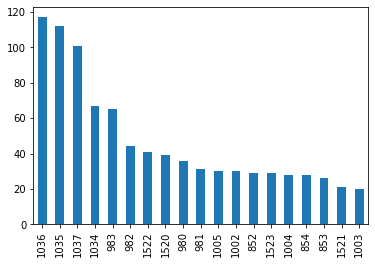

In [106]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

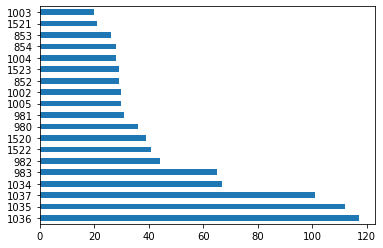

In [107]:
#Grafico de barras horizontais 
df["LojaID"].value_counts(ascending=False).plot.barh()

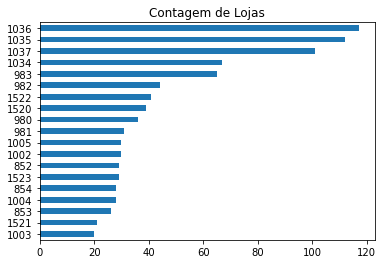

In [121]:
import matplotlib.pyplot as plt
df["LojaID"].value_counts(ascending=True).plot.barh(title="Contagem de Lojas");

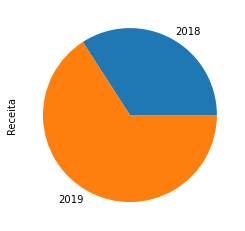

In [114]:
#Criando grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [116]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

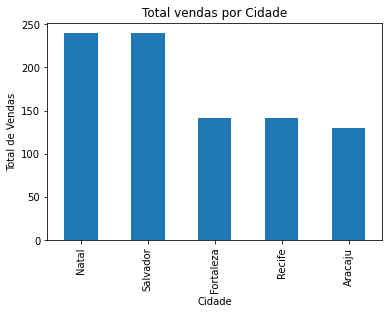

In [119]:
#Adicionando titulos e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

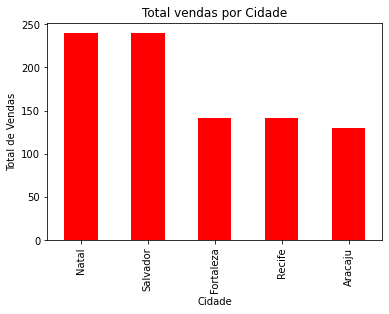

In [122]:
#Alterando as cores
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

In [123]:
#alterando o estilo
plt.style.use("ggplot")


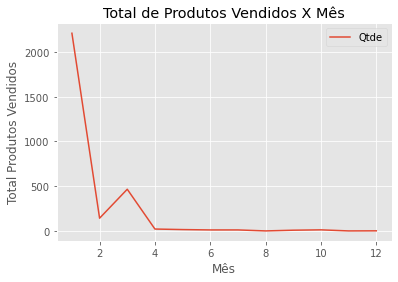

In [128]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de Produtos Vendidos X Mês");
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

In [129]:
#Agrupando meses de venda x quantidade
df.groupby(df["mes_venda"])["Qtde"].sum()


mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [131]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [136]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

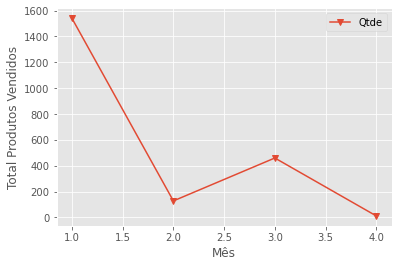

In [137]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v");
plt.xlabel("Mês");
plt.ylabel("Total Produtos Vendidos");
plt.legend();

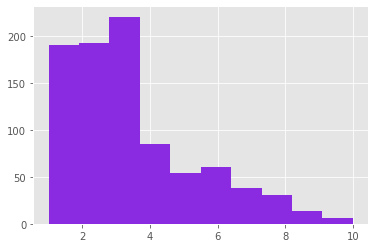

In [141]:
#histograma
plt.hist(df["Qtde"], color="blueviolet");


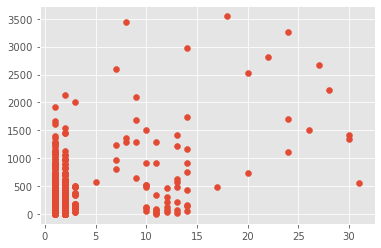

In [142]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);